# 2020 NFL Ratings (cont.): Your Choice of Loss Function Matters
# AND: Strength of Schedule Analysis (as of 01/27/2021)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.chdir("../")
os.getcwd()

'/Users/jakesingleton/Documents/projects/football'

In [4]:
# Read in entire Excel rankings file
# Unless otherwise noted, these rankings include all games through playoffs round 1

# In the 0th index are the rankings resulting from minimizing the sum of squared errors (SSE)
# In the 1st are the rankings resulting from minimizing the sum of absolute errors (SAE)
# In the 2nd are those from minimizing SSE with CLE's Week 1, Week 6, and Week 16 games removed. Also removed are PIT's and KC's Week 17 games
# In the 3rd are offensive and defensive ratings from minimizing SSE

xlsx = pd.ExcelFile("./data/nfl_rankings.xlsx")

In [5]:
# Rankings from minimizing sum of squared errors
sq_error_min_frame = pd.read_excel(xlsx, 0).iloc[0:32, 0:4].drop("ID", axis = 1)
sq_error_min_frame.head()

,Team,Rating,Rank
0,Tampa Bay Buccaneers,11.0527,1
1,New Orleans Saints,9.53966,2
2,Green Bay Packers,8.36834,3
3,Baltimore Ravens,7.40164,4
4,Buffalo Bills,7.34655,5


In [6]:
# Rankings from minimizing sum of absolute errors
abs_error_min_frame = pd.read_excel(xlsx, 1).iloc[0:32, 0:4].drop("ID", axis = 1)
abs_error_min_frame.tail()

,Team,Rating,Rank
27,Atlanta Falcons,-4.86348,28
28,Philadelphia Eagles,-4.86362,29
29,Houston Texans,-4.86364,30
30,New York Jets,-11.1299,31
31,Jacksonville Jaguars,-12.7898,32


In [7]:
# Rankings from minimizing SSE with games removed
sq_error_removed_min_frame = pd.read_excel(xlsx, 2).iloc[0:32, 0:4].drop("ID", axis = 1)
sq_error_removed_min_frame.head()

,Team,Rating,Rank
0,Tampa Bay Buccaneers,11.0844,1
1,New Orleans Saints,9.53411,2
2,Green Bay Packers,8.42443,3
3,Kansas City Chiefs,7.86805,4
4,Buffalo Bills,7.04152,5


In [8]:
# Offensive and defensive ratings from minimizing SSE
off_def_sse_min_frame = pd.read_excel(xlsx, 3).iloc[0:32, 0:7].drop("ID", axis = 1)
off_def_sse_min_frame.head()

,Team,Rating,Off._Rating,Def._Rating,Off. Rank,Def. Rank
0,Arizona Cardinals,2.40917,1.4871,-0.922062,11,16
1,Atlanta Falcons,1.00016,0.194336,-0.805824,17,17
2,Baltimore Ravens,7.40164,1.7934,-5.60825,9,2
3,Buffalo Bills,7.34655,6.08413,-1.26242,3,15
4,Carolina Panthers,-0.770748,-2.13203,-1.36128,23,14


In [9]:
# Define a jump as SAE_Rank - SSE_Rank

# First join the two frames
SAE_SSE_binded = abs_error_min_frame.merge(sq_error_min_frame, how = "inner", on = "Team", suffixes = ('_SAE', '_SSE'))

SAE_SSE_binded['Jump'] = SAE_SSE_binded['Rank_SAE'] - SAE_SSE_binded['Rank_SSE']
SAE_SSE_binded.head()

,Team,Rating_SAE,Rank_SAE,Rating_SSE,Rank_SSE,Jump
0,Tampa Bay Buccaneers,12.1361,1,11.0527,1,0
1,Baltimore Ravens,9.87862,2,7.40164,4,-2
2,Green Bay Packers,9.13629,3,8.36834,3,0
3,Buffalo Bills,8.13637,4,7.34655,5,-1
4,Los Angeles Rams,7.7919,5,5.26955,7,-2


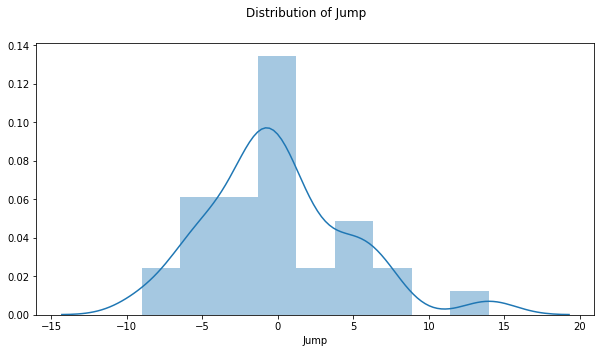

In [10]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribution of Jump')
hist = sns.distplot(SAE_SSE_binded['Jump'], kde = True);

We see that the distribution of Jump is slightly right-skewed, meaning teams tended to benefit more from the squared error than from the absolute error.

In [11]:
mean_jump = np.mean(SAE_SSE_binded['Jump'])
sd_jump = np.std(SAE_SSE_binded['Jump'])

print('Mean Jump: ', mean_jump)
print('SD Jump: ', sd_jump)

Mean Jump:  0.0
SD Jump:  4.670385423067351


In [12]:
# Examine big jumps
big_jumps = SAE_SSE_binded[np.abs(SAE_SSE_binded['Jump']) >= sd_jump]
big_jumps

,Team,Rating_SAE,Rank_SAE,Rating_SSE,Rank_SSE,Jump
5,Miami Dolphins,5.1378,6,2.78689,11,-5
8,New Orleans Saints,2.13684,9,9.53966,2,7
11,Las Vegas Raiders,1.13654,12,-1.83711,21,-9
12,Seattle Seahawks,1.13643,13,4.76546,8,5
14,Cleveland Browns,0.137076,15,-1.62474,20,-5
15,Minnesota Vikings,0.136168,16,-2.18591,22,-6
19,San Francisco 49ers,-1.86374,20,0.694481,15,5
20,Denver Broncos,-2.10774,21,-6.01357,28,-7
22,Washington Football Team,-3.86366,23,-0.759452,17,6
23,Detroit Lions,-4.07182,24,-7.45683,29,-5


In [13]:
# Convert to long form for plotting purposes
long_format = (pd.melt(big_jumps, id_vars = ["Team"], value_vars = ["Rank_SAE", "Rank_SSE"])
               .rename(columns = {'variable': 'Loss Function', 'value': 'Rank'}))
long_format

,Team,Loss Function,Rank
0,Miami Dolphins,Rank_SAE,6
1,New Orleans Saints,Rank_SAE,9
2,Las Vegas Raiders,Rank_SAE,12
3,Seattle Seahawks,Rank_SAE,13
4,Cleveland Browns,Rank_SAE,15
5,Minnesota Vikings,Rank_SAE,16
6,San Francisco 49ers,Rank_SAE,20
7,Denver Broncos,Rank_SAE,21
8,Washington Football Team,Rank_SAE,23
9,Detroit Lions,Rank_SAE,24


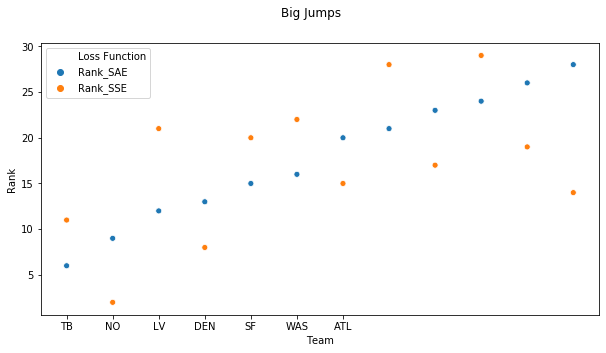

In [14]:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Big Jumps')
scatter = sns.scatterplot(x = "Team", y = "Rank", hue = "Loss Function", data = long_format)
plt.xticks(np.arange(0, 7), labels = ["TB", "NO", "LV", "DEN", "SF", "WAS", "ATL"]);

plt.savefig("./images/big_jumps.png")

Remember, a lower rank is better, so we see that 5/7 teams benefited from SSE minimization, whereas the remaining 2 benefited more from SAE minimization. We saw this in the histogram above. Let's try to figure out why. First let's read in our game data:

In [15]:
# Import data
dat = pd.read_csv('./data/nfl_game_data.csv', index_col = None)
dat.head()

,Game #,Home Team,Away Team,ID_Home,ID_Away,Home Score,Away Score,Margin
0,1,Kansas City Chiefs,Houston Texans,15,12,34,20,14
1,2,Buffalo Bills,New York Jets,3,21,27,17,10
2,3,Atlanta Falcons,Seattle Seahawks,1,28,25,38,-13
3,4,Washington Football Team,Philadelphia Eagles,31,23,27,17,10
4,5,Baltimore Ravens,Cleveland Browns,2,7,38,6,32


In [16]:
# Searching for double-digit victories
dat[dat['Margin'] >= 10].groupby('Home Team').size().sort_values(ascending = False)

Home Team
Baltimore Ravens            5
Buffalo Bills               5
Green Bay Packers           5
Tampa Bay Buccaneers        4
New Orleans Saints          4
Miami Dolphins              4
Washington Football Team    3
Kansas City Chiefs          3
Seattle Seahawks            3
New England Patriots        3
Los Angeles Rams            3
Indianapolis Colts          3
Carolina Panthers           2
Cincinnati Bengals          2
Las Vegas Raiders           2
Tennessee Titans            2
Pittsburgh Steelers         2
Houston Texans              1
Los Angeles Chargers        1
Dallas Cowboys              1
Cleveland Browns            1
Minnesota Vikings           1
Chicago Bears               1
New York Giants             1
Philadelphia Eagles         1
Atlanta Falcons             1
Arizona Cardinals           1
dtype: int64

In [17]:
dat[dat['Margin'] <= -10].groupby('Away Team').size().sort_values(ascending = False)

Away Team
Tampa Bay Buccaneers        4
Baltimore Ravens            4
Arizona Cardinals           3
San Francisco 49ers         3
Buffalo Bills               3
New Orleans Saints          3
Miami Dolphins              3
Los Angeles Rams            3
Green Bay Packers           3
Indianapolis Colts          3
Tennessee Titans            2
Cleveland Browns            2
Kansas City Chiefs          2
Pittsburgh Steelers         2
Las Vegas Raiders           1
Houston Texans              1
Los Angeles Chargers        1
Detroit Lions               1
Dallas Cowboys              1
New England Patriots        1
Chicago Bears               1
Seattle Seahawks            1
Atlanta Falcons             1
Washington Football Team    1
dtype: int64

In [18]:
print("Average number of double-digit wins for team: ", 
      (dat[dat['Margin'] <= -10].groupby('Away Team').size().sort_values().sum() + 
       dat[dat['Margin'] >= 10].groupby('Home Team').size().sort_values().sum()) / 32)

Average number of double-digit wins for team:  3.59375


Here, we see that TB had a considerably high number of double-digit wins with 4 (at home) + 4 (away) = 8 relative to the average of 3.7. We also see NO had 8. Having a high number of double-digit victories means that the squared error will reward these teams more relative to other teams than the absolute error. Furthermore, note that TB and NO have elite defenses, ranking in at 9 and 3 respectively in my offensive and defensive rankings. Consequently, they suffered only 2 and 1 double-digit losse(s) respectively relative to the average of 3.7, meaning they aren't punished by the squared loss for getting blown out all that much.

Another interesting case study is the Atlanta Falcons, as they had the largest absolute jump at +12. That is, since jump = SAE_Rank - SSE_Rank, they fared much better with the squared loss. Let's take a look.

In [19]:
# Searching for one-score games
one_score_games = (dat[np.abs(dat['Margin']) <= 8].groupby(["Away Team"]).size() + 
                 dat[np.abs(dat['Margin']) <= 8].groupby(["Home Team"]).size()).sort_values(ascending = False)
one_score_games

Away Team
Los Angeles Chargers        12
Seattle Seahawks            11
Carolina Panthers           11
Chicago Bears               11
Atlanta Falcons             10
Denver Broncos              10
New York Giants             10
Houston Texans              10
Minnesota Vikings           10
Kansas City Chiefs           9
Cleveland Browns             9
Tennessee Titans             9
Las Vegas Raiders            9
Arizona Cardinals            9
Pittsburgh Steelers          9
Philadelphia Eagles          9
Los Angeles Rams             8
Detroit Lions                8
San Francisco 49ers          8
Cincinnati Bengals           8
Dallas Cowboys               8
New Orleans Saints           8
Washington Football Team     8
Miami Dolphins               7
Indianapolis Colts           7
Jacksonville Jaguars         7
New England Patriots         7
Green Bay Packers            6
New York Jets                6
Buffalo Bills                6
Baltimore Ravens             6
Tampa Bay Buccaneers         

Here, we see the Falcons won or lost by one score in 10 of their games.

In [20]:
mean_one_score = one_score_games.mean()
sd_one_score = one_score_games.std()
print("Average number of one score games played by a team: ", mean_one_score)
print("SD of number of one score games played by a team: ", sd_one_score)
print("Number of SDs above mean for ATL: ", (10 - mean_one_score) / sd_one_score)

Average number of one score games played by a team:  8.5
SD of number of one score games played by a team:  1.6655910507645917
Number of SDs above mean for ATL:  0.9005812076808548


So, the Falcons were close to one standard deviation above the mean in terms of one score games played. Thus, relative to the many teams that played fewer one score games, ATL is penalized a lot less by the squared error. As a result, the squared error treats them a lot nicer.

What about the two teams that benefited more from the absolute error: Las Vegas and Denver?

In [21]:
# Searching for LV and DEN BIG losses
lv_den_games = dat[((dat['Home Team'] == 'Las Vegas Raiders') & (dat['Margin'] <= -10)) |
                  ((dat['Away Team'] == 'Las Vegas Raiders') & (dat['Margin'] >= 10)) |
                  ((dat['Home Team'] == 'Denver Broncos') & (dat['Margin'] <= -10)) |
                  ((dat['Away Team'] == 'Denver Broncos') & (dat['Margin'] >= 10))]
lv_den_games.iloc[(-lv_den_games["Margin"].abs()).argsort, :]

,Game #,Home Team,Away Team,ID_Home,ID_Away,Home Score,Away Score,Margin
163,164,Atlanta Falcons,Las Vegas Raiders,1,22,43,6,37
209,210,Denver Broncos,Buffalo Bills,9,3,19,48,-29
172,173,Denver Broncos,New Orleans Saints,9,19,3,31,-28
102,103,Denver Broncos,Kansas City Chiefs,9,15,16,43,-27
99,100,Las Vegas Raiders,Tampa Bay Buccaneers,22,29,20,45,-25
139,140,Las Vegas Raiders,Denver Broncos,22,9,37,12,25
44,45,Denver Broncos,Tampa Bay Buccaneers,9,29,10,28,-18
201,202,Las Vegas Raiders,Indianapolis Colts,22,13,27,44,-17
38,39,New England Patriots,Las Vegas Raiders,18,22,36,20,16


Here we see that LV suffered a brutal 37 point loss and DEN suffered 29, 28, 27, and 25 point losses. These big losses  all contribute to large penalties in the squared error rankings, since we square the error term. With the absolute error, we just take the absolute value, resulting in a smaller penalty. This is why these teams do much better in the absolute error rankings.

Another quick note should be made regarding the result of removing games.

In [22]:
(sq_error_removed_min_frame[(sq_error_removed_min_frame["Team"] == 'Kansas City Chiefs') |
                            (sq_error_removed_min_frame["Team"] == 'Cleveland Browns')]
    .merge(sq_error_min_frame, how = "inner", on = "Team", suffixes = ("_Rem", "_Sq"))
    .merge(abs_error_min_frame, how = "inner", on = "Team")).rename(columns = {"Rank": "Rank_Abs", "Rating": "Rating_Abs"})

,Team,Rating_Rem,Rank_Rem,Rating_Sq,Rank_Sq,Rating_Abs,Rank_Abs
0,Kansas City Chiefs,7.86805,4,6.48404,6,5.13697,7
1,Cleveland Browns,2.60365,10,-1.62474,20,0.137076,15


When we remove KC's week 17 blowout loss to the Chargers in which they rested their starters, their rating is all of a sudden almost 1.5 points better than when we leave this game in the data with the squared loss. Their rank is 3 spots better, too. Note how this removal yields values quite close to those with all of the data but with absolute loss.

Furthermore, CLE's rating improves by over 4 points after removing their blowout losses in weeks 1 and 6 and their week 16 game in which their entire WR core was out due to COVID. Again, note how these removals tend to yield more similar results to using the absolute error. In addition, note that these CLE numbers include their most recent playoff win against Pittsburgh in which they won by 11 points.

Hence, we see that removing "outlier" games has a similar (but more drastic effect) to using absolute loss. This is quite instructive!

## Strength of Schedule Analysis

We find a team's strength of schedule (SoS) by averaging the ratings of their opponents. I do so below first using the squared error ratings, and then I write a function that does it for all sets of ratings.

In [23]:
# Strength of Schedule
game_dat_sq_error = pd.read_excel(xlsx, 0).iloc[35:303, 0:8].rename(columns = {"Team": "Game#", "ID": "Home", "Rating": "Away", 
                                                                               "Rank": "HomeID", "Unnamed: 4": "AwayID", 
                                                                               "Highlighted = playoff team": "Home Score", 
                                                                               "Unnamed: 6": "Away Score", "Unnamed: 7": "Margin"})

In [24]:
game_dat_sq_error.head()

,Game#,Home,Away,HomeID,AwayID,Home Score,Away Score,Margin
35,1,Kansas City Chiefs,Houston Texans,15,12,34,20,14
36,2,Buffalo Bills,New York Jets,3,21,27,17,10
37,3,Atlanta Falcons,Seattle Seahawks,1,28,25,38,-13
38,4,Washington Football Team,Philadelphia Eagles,31,23,27,17,10
39,5,Baltimore Ravens,Cleveland Browns,2,7,38,6,32


In [25]:
sq_error_min_frame.head()

,Team,Rating,Rank
0,Tampa Bay Buccaneers,11.0527,1
1,New Orleans Saints,9.53966,2
2,Green Bay Packers,8.36834,3
3,Baltimore Ravens,7.40164,4
4,Buffalo Bills,7.34655,5


In [26]:
# This df gets the sum of every home team's away opponents
away_teams_rating = (game_dat_sq_error.merge(sq_error_min_frame, left_on="Home", right_on="Team")
 .merge(sq_error_min_frame, left_on="Away", right_on="Team", suffixes=("_Home", "_Away"))
 .groupby("Team_Home").agg({'Rating_Away': 'sum'}))

# This df gets the sum of every away team's home opponents
home_teams_rating = (game_dat_sq_error.merge(sq_error_min_frame, left_on="Away", right_on="Team")
 .merge(sq_error_min_frame, left_on="Home", right_on="Team", suffixes=("_Away", "_Home"))
 .groupby("Team_Away").agg({'Rating_Home': 'sum'}))

# Outputs
display(away_teams_rating.head())
display(home_teams_rating.tail())

,Rating_Away
Team_Home,
Arizona Cardinals,8.134758
Atlanta Falcons,9.626138
Baltimore Ravens,-19.119878
Buffalo Bills,17.504212
Carolina Panthers,9.040761


,Rating_Home
Team_Away,
San Francisco 49ers,-0.562989
Seattle Seahawks,14.235459
Tampa Bay Buccaneers,7.472083
Tennessee Titans,-14.416749
Washington Football Team,-16.624202


In [27]:
# Join the above frames together
opponent_ratings = (home_teams_rating.reset_index().merge(away_teams_rating.reset_index(), left_on="Team_Away", right_on="Team_Home"))
display(opponent_ratings.head())

# Take the sum
opponent_ratings['Sum Opponent Ratings'] = opponent_ratings["Rating_Home"] + opponent_ratings["Rating_Away"]

# Clean
opponent_ratings = opponent_ratings.drop(columns=["Rating_Home", "Team_Home", "Rating_Away"], axis = 1).rename(columns={"Team_Away": "Team"})
display(opponent_ratings)

,Team_Away,Rating_Home,Team_Home,Rating_Away
0,Arizona Cardinals,-12.588083,Arizona Cardinals,8.134758
1,Atlanta Falcons,24.376412,Atlanta Falcons,9.626138
2,Baltimore Ravens,-5.915864,Baltimore Ravens,-19.119878
3,Buffalo Bills,-6.787066,Buffalo Bills,17.504212
4,Carolina Panthers,30.627197,Carolina Panthers,9.040761


,Team,Sum Opponent Ratings
0,Arizona Cardinals,-4.453325
1,Atlanta Falcons,34.002550
2,Baltimore Ravens,-25.035741
3,Buffalo Bills,10.717146
4,Carolina Panthers,39.667958
5,Chicago Bears,15.758930
6,Cincinnati Bengals,-9.186528
7,Cleveland Browns,-24.510762
8,Dallas Cowboys,-5.829204
9,Denver Broncos,26.782937


In [28]:
# Now, to take the average, we just need the # of games played by each team
num_games = pd.DataFrame(game_dat_sq_error.groupby("Home").size() + game_dat_sq_error.groupby("Away").size()).rename(columns={0: "GP"}).reset_index()
num_games

,Home,GP
0,Arizona Cardinals,16
1,Atlanta Falcons,16
2,Baltimore Ravens,18
3,Buffalo Bills,19
4,Carolina Panthers,16
5,Chicago Bears,17
6,Cincinnati Bengals,16
7,Cleveland Browns,18
8,Dallas Cowboys,16
9,Denver Broncos,16


In [29]:
# Join w/ opponent_ratings to find SoS
opponent_ratings = opponent_ratings.merge(num_games, left_on="Team", right_on="Home").drop(columns="Home", axis=1)
opponent_ratings['Avg. Opponent Rating'] = opponent_ratings["Sum Opponent Ratings"] / opponent_ratings["GP"]

# Rank! (Higher means you played a tougher SoS)
opponent_ratings["SoS Rank"] = opponent_ratings['Avg. Opponent Rating'].rank(ascending=False)
opponent_ratings = opponent_ratings.sort_values(by="SoS Rank")
opponent_ratings

,Team,Sum Opponent Ratings,GP,Avg. Opponent Rating,SoS Rank
4,Carolina Panthers,39.667958,16,2.479247,1.0
1,Atlanta Falcons,34.002550,16,2.125159,2.0
24,New York Jets,28.042991,16,1.752687,3.0
29,Tampa Bay Buccaneers,32.304830,19,1.700254,4.0
9,Denver Broncos,26.782937,16,1.673934,5.0
27,San Francisco 49ers,25.111627,16,1.569477,6.0
10,Detroit Lions,22.690831,16,1.418177,7.0
22,New Orleans Saints,24.979291,18,1.387738,8.0
18,Los Angeles Rams,22.586563,18,1.254809,9.0
5,Chicago Bears,15.758930,17,0.926996,10.0


So CAR and ATL (both in the NFC South) both had the most difficult schedules. IND and PIT had the easiest.

In [30]:
# This function outputs SoS rankings for a given set of rankings
# Works for rankings in container below. E.g. if you want SoS for abs. error ratings, you use desired_idx = 1
rating_sets = [sq_error_min_frame, abs_error_min_frame, sq_error_removed_min_frame]

def sos_ranks(desired_idx):
    # Read in data
    if desired_idx == 0 or desired_idx == 1:
        game_dat = pd.read_excel(xlsx, desired_idx).iloc[35:303, 0:8].rename(columns = {"Team": "Game#", "ID": "Home", "Rating": "Away", 
                                                            "Rank": "HomeID", "Unnamed: 4": "AwayID", 
                                                            "Highlighted = playoff team": "Home Score", 
                                                            "Unnamed: 6": "Away Score", "Unnamed: 7": "Margin"})
    else:
        game_dat = pd.read_excel(xlsx, desired_idx).iloc[35:298, 0:8].rename(columns = {"Team": "Game#", "ID": "Home", "Rating": "Away", 
                                                            "Rank": "HomeID", "Unnamed: 4": "AwayID", 
                                                            "Highlighted = playoff team": "Home Score", 
                                                            "Unnamed: 6": "Away Score", "Unnamed: 7": "Margin"})
    desired_ratings = rating_sets[desired_idx]
    
    # This df gets the sum of every home team's away opponents
    away_teams_rating = (game_dat.merge(desired_ratings, left_on="Home", right_on="Team")
     .merge(desired_ratings, left_on="Away", right_on="Team", suffixes=("_Home", "_Away"))
     .groupby("Team_Home").agg({'Rating_Away': 'sum'}))
    
    # This df gets the sum of every away team's home opponents
    home_teams_rating = (game_dat.merge(desired_ratings, left_on="Away", right_on="Team")
     .merge(desired_ratings, left_on="Home", right_on="Team", suffixes=("_Away", "_Home"))
     .groupby("Team_Away").agg({'Rating_Home': 'sum'}))
    
    # Join the above frames together
    opponent_ratings = (home_teams_rating.reset_index().merge(away_teams_rating.reset_index(), left_on="Team_Away", right_on="Team_Home"))

    # Take the sum
    opponent_ratings['Sum Opponent Ratings'] = opponent_ratings["Rating_Home"] + opponent_ratings["Rating_Away"]

    # Clean
    opponent_ratings = opponent_ratings.drop(columns=["Rating_Home", "Team_Home", "Rating_Away"], axis = 1).rename(columns={"Team_Away": "Team"})
    
    # Now, to take the average, we just need the # of games played by each team
    num_games = pd.DataFrame(game_dat.groupby("Home").size() + game_dat.groupby("Away").size()).rename(columns={0: "GP"}).reset_index()
    
    # Join w/ opponent_ratings to find SoS
    opponent_ratings = opponent_ratings.merge(num_games, left_on="Team", right_on="Home").drop(columns="Home", axis=1)
    opponent_ratings['Avg. Opponent Rating'] = opponent_ratings["Sum Opponent Ratings"] / opponent_ratings["GP"]
    
    # Rank! (Higher means you played a tougher SoS)
    opponent_ratings["SoS Rank"] = opponent_ratings['Avg. Opponent Rating'].rank(ascending=False)
    opponent_ratings = opponent_ratings.sort_values(by="SoS Rank")
    return opponent_ratings

In [31]:
# SoS Ranks for Abs. Error Ratings
sos_ranks(1)

,Team,Sum Opponent Ratings,GP,Avg. Opponent Rating,SoS Rank
24,New York Jets,30.622415,16,1.913901,1.0
1,Atlanta Falcons,30.411920,16,1.900745,2.0
4,Carolina Panthers,23.730931,16,1.483183,3.0
22,New Orleans Saints,24.003748,18,1.333542,4.0
21,New England Patriots,20.806567,16,1.300410,5.0
9,Denver Broncos,19.931865,16,1.245742,6.0
27,San Francisco 49ers,14.108176,16,0.881761,7.0
14,Jacksonville Jaguars,13.717697,16,0.857356,8.0
15,Kansas City Chiefs,13.458271,18,0.747682,9.0
16,Las Vegas Raiders,10.443993,16,0.652750,10.0


In [32]:
# SoS Ratings for Sq. Error Ratings w/ Removed Games
sos_ranks(2)

,Team,Sum Opponent Ratings,GP,Avg. Opponent Rating,SoS Rank
4,Carolina Panthers,39.185071,16,2.449067,1.0
1,Atlanta Falcons,33.525951,16,2.095372,2.0
24,New York Jets,26.417688,15,1.761179,3.0
29,Tampa Bay Buccaneers,31.916480,19,1.679815,4.0
10,Detroit Lions,23.486375,16,1.467898,5.0
9,Denver Broncos,22.643244,16,1.415203,6.0
27,San Francisco 49ers,22.507904,16,1.406744,7.0
22,New Orleans Saints,24.517439,18,1.362080,8.0
18,Los Angeles Rams,19.914906,18,1.106384,9.0
5,Chicago Bears,16.570321,17,0.974725,10.0


Cool! So there's no doubt that the NFC South was tough (due to TB & NO) and the Jets had a tough time due to strong teams in MIA, NE, and BUF. Note that of the two Super Bowl teams, KC and TB, TB definitely played the tougher schedule. There's no doubt that having to play the Saints twice largely explains this.

In [ ]:
# 